# Assignment 5: Performance Evaluation of LLMs by Shi Kai

**Dec. 31, 2024**

## 任务 5：大模型能力评估（40分）

### 作业要求

从开源和闭源两类大模型中，每一类至少选择 2 个模型、每个模型至少选择 2 个版本，参考文献中给出的评价指标，评估不同的大模型求解简单数学问题的能力。进一步，通过尝试优化提示、改进模型 CoT 推理过程等方法，提升大模型的性能。

### 参考数据

[GSM8K](https://huggingface.co/datasets/openai/gsm8k)

### 要求

撰写 5 页以内的评测报告，至少包含使用的模型及其特点、优化后的 Prompt、模型性能对比与分析等。

### 参考文献
 - [Karl Cobbe, et, at. Training Verifiers to Solve Math Word Problems. 2021.](https://arxiv.org/abs/2110.14168) 

---
---

# 实验报告

## 1. 系统及硬件环境

 - 系统环境
 
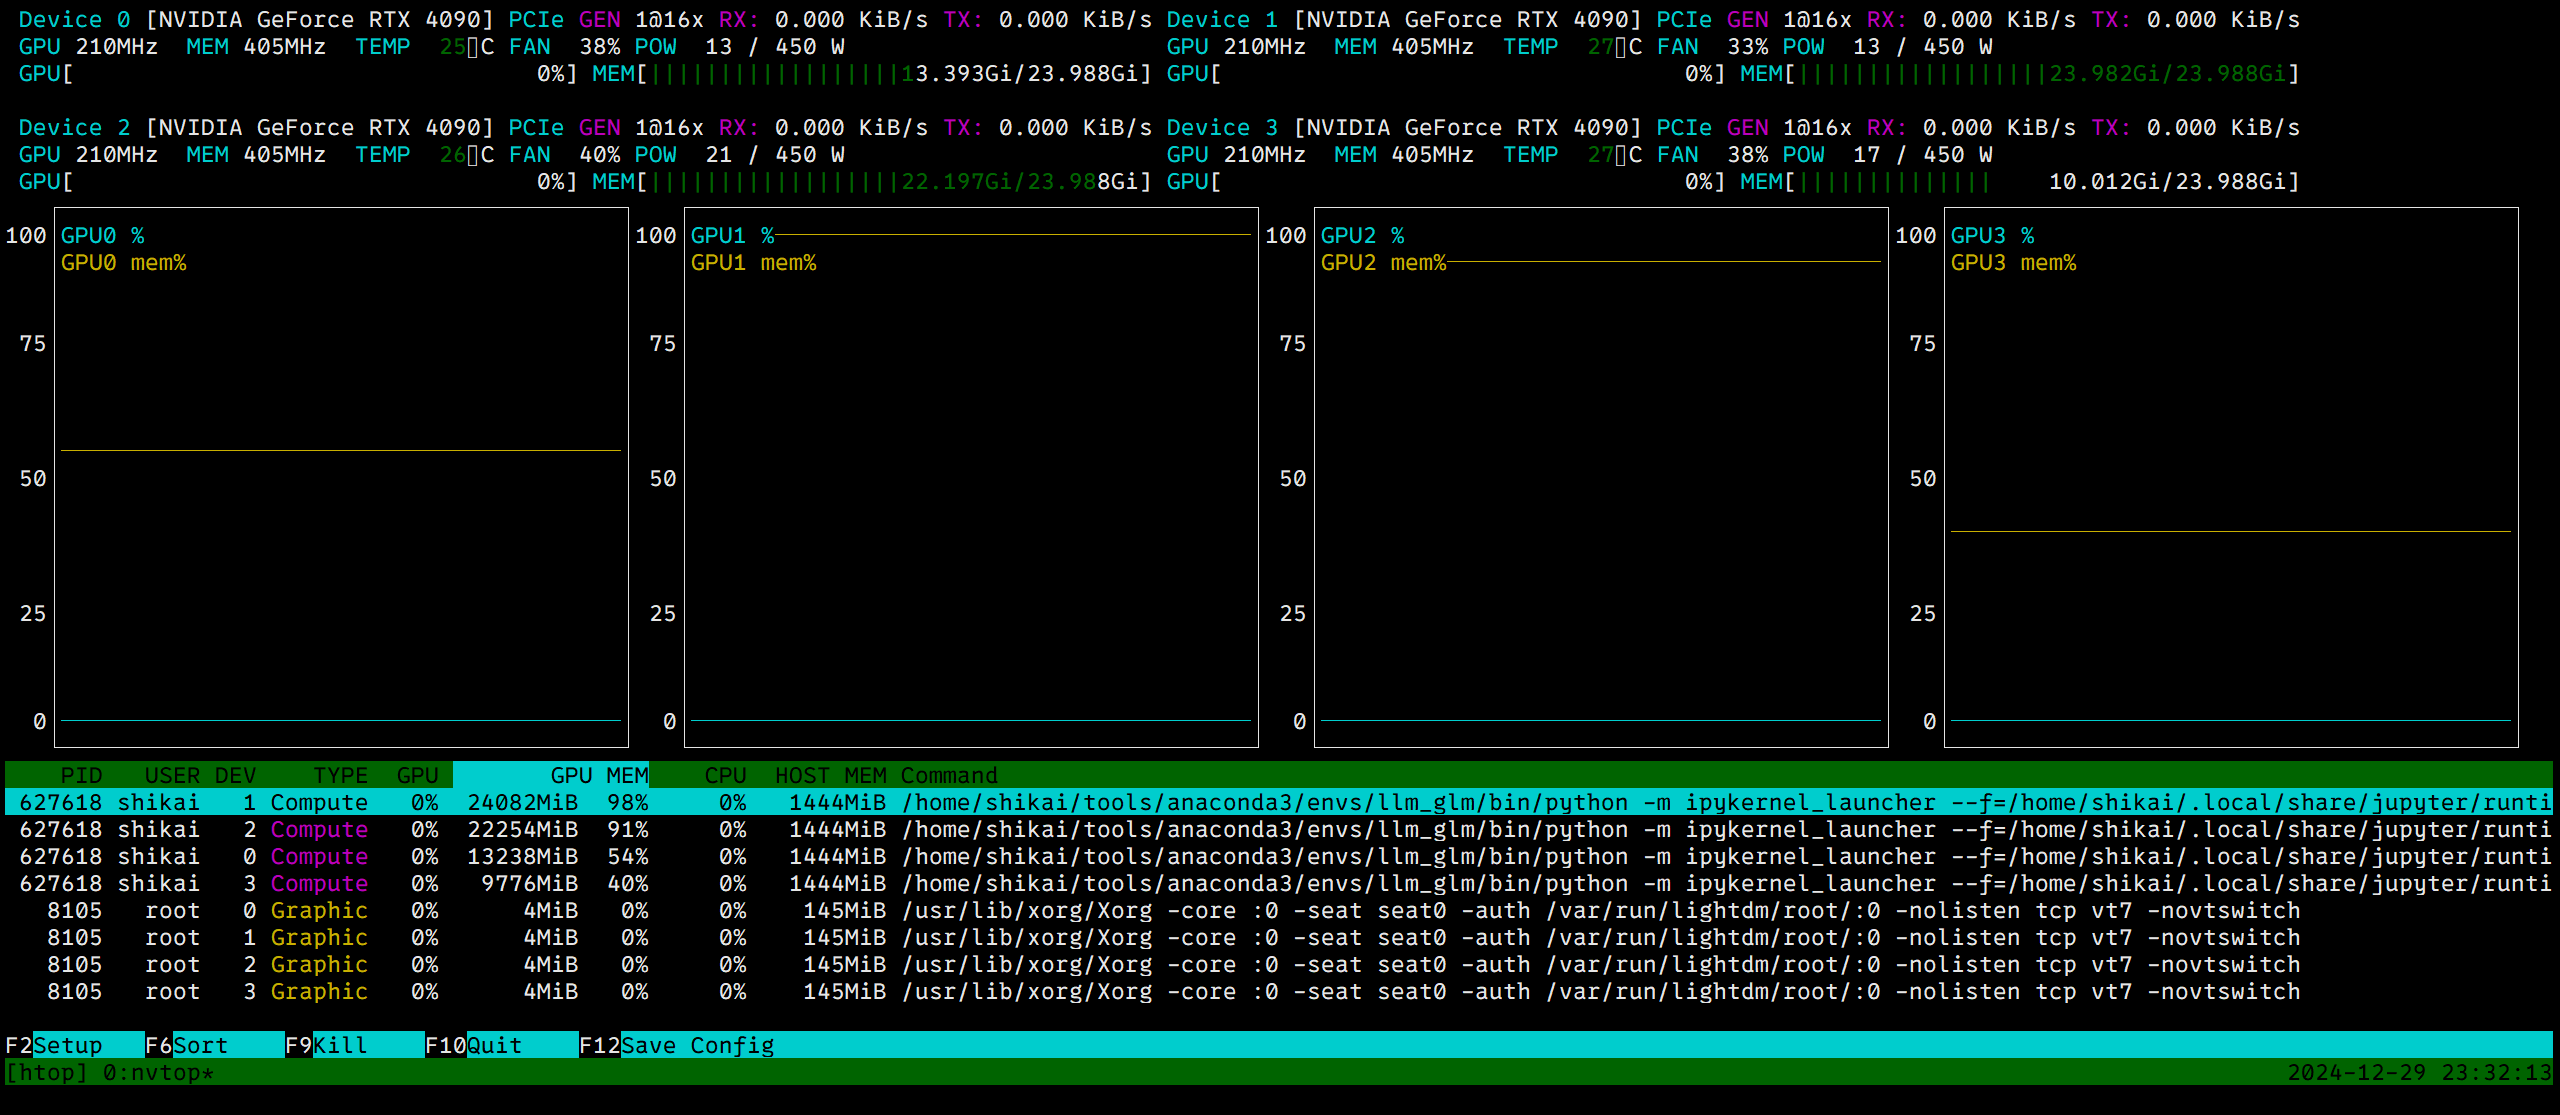

 - GPU 及 CUDA 版本

```text
Wed Jan  1 10:30:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:4F:00.0 Off |                  Off |
| 38%   22C    P8             13W /  450W |      18MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
|   1  NVIDIA GeForce RTX 4090        Off |   00000000:57:00.0 Off |                  Off |
| 33%   24C    P8             12W /  450W |   20179MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
|   2  NVIDIA GeForce RTX 4090        Off |   00000000:CE:00.0 Off |                  Off |
| 40%   23C    P8             21W /  450W |    5587MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
|   3  NVIDIA GeForce RTX 4090        Off |   00000000:D6:00.0 Off |                  Off |
| 38%   25C    P8             17W /  450W |      18MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
```

 - 软件及 NN 框架版本

```bash
Python==3.10.12
torch==2.5.1+cu121
torchaudio==2.5.1+cu121
torchvision==0.20.1+cu121
transformers==4.47.1(+4.41.2)
```

## 2. 选用的模型及特点

### 2.1 开源模型 1

 - ChatGLM2-6B
    - ChatGLM2 是一个大规模中文预训练语言模型，专为中文对话任务优化。具有 6B 的参数，支持中英文对话，对多轮对话和长文本进行了优化。
 - ChatGLM4-9B
    - 是 6B 版本的升级版，包含更多参数，针对复杂对话和推理任务表现更强。

### 2.2 开源模型 2

 - LLAMA-2-7B-Chat
    - LLAMA-2 是 Meta 推出的开源大规模语言模型，针对多语言支持进行了优化。支持多种任务，包括对话、文本生成和推理任务。
 - LLAMA-2-13B-Chat
    - 是其不同参数规模的版本

### 2.3 闭源模型 1

 - GPT-3.5-turbo
    - GPT 系列是 OpenAI 开发的、目前最为知名的语言模型系列。GPT-3.5-turbo 是 GPT-3系列的优化版，专为生成任务进行了精细调优，响应速度和输出质量均有提高。
 - GPT-4o-mini
    - 是相较于 GPT-4 的一个轻量化版本，针对小型应用和低资源环境进行了优化。

### 2.4 闭源模型 2

 - o1-mini
    - o1 系列仍由 OpenAI 开发，其具体框架不详。o1-mini 是 1 系列中的轻量版，具备较小的模型参数
 - o1-preview
    - o1 系列的预览版，相较 o1-mini 参数更多，性能更强。


# 3. 测试集 - [GSM8K](https://huggingface.co/datasets/openai/gsm8k)

GSM8K（Grade-School Math 8K) 数据集用于数学推理任务，包含了大约 8000 个由小学到初中水平的数学题目，适用于训练和评估能够处理数学文字题的模型。这些问题大多涉及基础的算数、代数和应用题等，主要面向解决实际的数学问题，而不是单纯的符号运算。

 - 特点
    - 数学问题类型：包含多种类型的数学问题，如加法、减法、乘法、除法、分数计算、代数问题等。所有问题都被转换成文字描述，模型需要从中提取关键信息并进行推理。

    - 问题格式：每个问题都以文字形式描述，通常涉及到常见的数学情境，如物品的价格、距离和时间的计算等。题目一般比较简单，但包含一定的推理成分。

    - 答案：每个问题都有一个准确的答案，模型的任务是通过理解问题并推导出正确的解答。

    - 任务目标：模型需要通过自然语言处理技巧（如信息抽取、推理等）来理解问题，进行必要的数学计算，并生成正确的答案。对于复杂问题，模型还需要能够进行多步推理。
 - 数据示例（sample 0 in testing set）
    - 问题: *Janet’s ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?*
    - 答案: *Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day.\nShe makes 9 * 2 = $<<9*2=18>>18 every day at the farmer’s market.\n#### 18*

## 3.1 用多少数据样本进行测试 ？

考虑到测试时间的问题，后续实验只使用了 GSM8K 测试集中前100个问题（总共 1319 个样本）进行测试。我有尝试分别用 GLM2 和 GLM4 模型测试到 800+ 个问题，在 4090 上大约要 2 ~ 3 个小时，并且测试结果的准确率在前 100 个样本内就趋于稳定。因此考虑到时间因素和后续测试 OpenAI 闭源模型的 API 成本，本 Lab 的所有实验均基于 GSM8K 测试集的前 100 个问题进行测试。

[注] o1-preview 模型只用了 20 个问题进行测试，因为它太贵了... （20个问题用了 1 刀）

## 3.2 如何衡量模型推理结果的准确性？

首先，不论我们是否对模型引入 CoT 提示词，模型都应该会给出一个数学问题的数值结果。因此，我们通过比较测试集中数值结果（Ground Truth）和待测试模型的生成结果（Answer）进行数值比较，便能直接得到模型在该问题上正确与否的判断。
对这 100 个问题，统计正确回答的问题数量，即可得到模型在 GSM8K 问题上的推理准确率。

GSM8K中，测试集的 Ground Truth 是会以固定 pattern 给出数值结果（比如：`#### 18`）, 然而，本 Lab 测试的 8 个模型，在回答问题时并不会按固定的格式给出答案。因此，为了提取出模型的数值结果，我们需要对模型的回答进行规范化：通过提供 system prompt，引导模型生成便于解析的数值答案。

比如对于模型原始回答：

*The house was bought for $80,000 and $50,000 in repairs was added, meaning the house is now worth $80,000 + $50,000 = $130,000. The profit Josh made is the difference between the house's new value and its old value, which is $130,000 - $80,000 = $50,000.*

在引入 System 提示词后，模型预期会生成符合解析规范的回答：

*The house was bought for $80,000 and $50,000 in repairs was added, meaning the house is now worth $80,000 + $50,000 = $130,000. The profit Josh made is the difference between the house's new value and its old value, which is $130,000 - $80,000 = $50,000.*
*The answer: 50000.*

然后通过正则表达式即可提取出模型回答的数值结果（当然，模型可能在数值中包含逗号分隔符，数值单位，美元符号，百分号等，这些均可通过正则剔除）。

此外，部分模型即使给了严格的提示词或者示例，也未必能够保证每个回答均按解析规范进行，对于这些未规范回答、无法正常解析的样本，我们将其忽略并替换为新的问题，不计入模型的准确率统计，同时保证有效的规范回答依然是 100 个。

## 3.3 如何优化模型的推理过程？

这里我通过引入 CoT(Chain of Thought）提示词的方式来指导模型生成数值结果，从而优化模型的推理过程，提高模型在数学推理问题上的准确率。

对于上述问题，我们可以引入以下提示词：

- 示例：
*<\<System\>> Answer the question step by step with detailed calculation. The house was bought for $80,000 and $50,000 ...*


# 4. 实验结果：模型性能对比与分析


<figure class="half">
    <img src="./images/Accuracy%20of%20Different%20LLM%20Models%20without%20COT%20prompt.png" width=700">
    <img src="./images/Accuracy%20of%20Different%20LLM%20Models%20with%20COT%20prompt.png" width="700">
</figure>

## 4.1 Without CoT Prompt

在所有模型中，o1-mini 和 o1-preview 的 Math Solving 能力最强，准确率几乎维持在 95% 以上；其次是 gpt-4o-mini，在 40 个样本之后，回答正确率趋于稳定值 90.91% 左右；其次是 gpt-3.5-turbo，在 30 个样本之后，回答正确率趋于稳定值 76.77% 左右；其次是 glm4-9b，60 个问题后，准确率稳定在 65.66% 左右；然后是 llama-2-7b 和 llama-2-13b，在 40 个样本之后，准确率维持在 45% 左右；最后是 glm2-6b，20 个样本后，准确率维持在 6% 左右。

## 4.2 With CoT Prompt

回答正确率最高的还是 o1 的两个版本，不过不止何故，引入 CoT 后，o1-mini 的准确率反而从 98.99% 下降到 95.96%；引入 CoT 后，gpt-4o-mini 和 gpt-3.5-turbo 在前 20 个样本上的准确率均下降了；glm4-9b 变化不明显；llama-2-7b 在 引入 CoT 后，准确率从 45% 下降到 35%；llama-2-13b 在前 60 个样本中准确率提升到 55% 左右，后 40 个问题准确率又下降了，整体准确率变化不大。**最显著的是**，glm2-6b 在引入 CoT 后，准确率从 6% 提升到 55.56% 左右！这说明 glm2-6b 在数学推理问题上的表现，受到了 CoT 提示词的极大帮助。

---
---

## 源码 👇
 - 开源模型
   - [ChatGLM2-6B](https://github.com/THUDM/ChatGLM2-6B)
     - [ChatGLM2-6B-hf](https://huggingface.co/THUDM/chatglm2-6b)
     - [ChatGLM4-9B-hf](https://huggingface.co/THUDM/glm-4-9b-chat-hf)
   - [LLAMA-2](https://huggingface.co/meta-llama)
     - [LLAMA-2-7B-Chat-hf](https://huggingface.co/meta-llama/Llama-2-7b-chat-hf)
     - [LLAMA-2-13B-Chat-hf](https://huggingface.co/meta-llama/Llama-2-13b-chat-hf)

 - 闭源模型
   - GPT
     - GPT-3.5-turbo
     - GPT-4o-mini
   - o1
     - o1-mini
     - o1-preview


其中，OpenAI 的 GPT 计价如下：

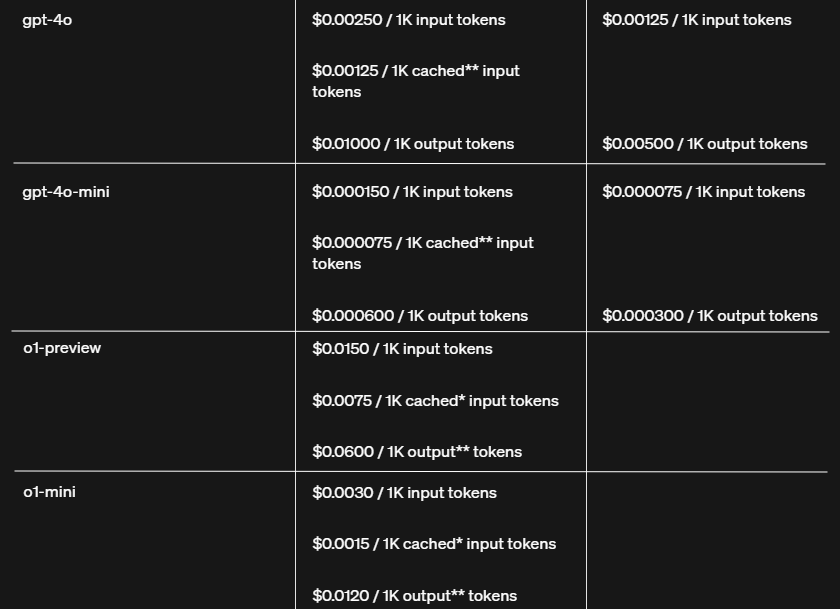


老师，做这些实验的费用可以报销么？ QAQ

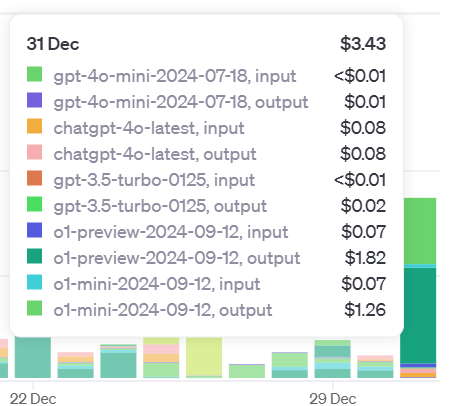

[注]

- LLAMA 的模型需要申请 [Meta 的许可证](https://ai.meta.com/resources/models-and-libraries/llama-downloads/) 才能下载。

---

In [1]:
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, GPTNeoXForCausalLM, GPT2Tokenizer

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from datasets import Dataset

In [2]:
# init logger
import logging, sys, codecs

logger = logging.getLogger()
logger.setLevel(logging.INFO)

def set_log_file(filename:str):
    for handler in logger.handlers[:]:
        logger.removeHandler(handler)

    handler = logging.FileHandler(filename, encoding='utf-8', mode='w')
    formatter = logging.Formatter('[%(asctime)s][%(levelname)s] %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
gsm8k_test_path = "../data/gsm8k/test-00000-of-00001.parquet"
gsm8k_train_path = "../data/gsm8k/train-00000-of-00001.parquet"

ds_test = Dataset.from_parquet(gsm8k_test_path)
ds_train = Dataset.from_parquet(gsm8k_train_path)

print(f"Train Dataset Sample: {ds_train[0]}")
print(f"Test Dataset Sample: {ds_test[0]}")

Train Dataset Sample: {'question': 'Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?', 'answer': 'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72'}
Test Dataset Sample: {'question': "Janet’s ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?", 'answer': 'Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day.\nShe makes 9 * 2 = $<<9*2=18>>18 every day at the farmer’s market.\n#### 18'}


---

## 开源模型 2.1 ChatGLM2-6B

### 模型实现和权重

由于本地连接 Huggingface 的网络环境不佳，故模型实现和权重均为本地加载。

- **[注意] 本模型需降级 transformers 模块:**

 ```bash
 pip uninstall transformers -y
 pip install transformers==4.41.2
 ```

后续实验中，再将 transformers 升级至最新版本。

```bash
pip uninstall transformers -y
pip install transformers
```

In [6]:
MODEL_PATH = "../data/chatglm2-6b"

if device.startswith("cuda"):
    device_glm2_6b = "cuda:2"

print(f"Using device: {device_glm2_6b} for ChatGLM2-6B.")

tokenizer_glm2_6b = AutoTokenizer.from_pretrained(MODEL_PATH, trust_remote_code=True)
model_glm2_6b = AutoModel.from_pretrained(MODEL_PATH, trust_remote_code=True, device=device_glm2_6b)
model_glm2_6b = model_glm2_6b.eval()

Using device: cuda:2 for ChatGLM2-6B.


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
def infer_with_glm2_6b(question, history=[]):
    with_prompt = f"Answer the following question. At the end of you answer, include 'The answer: xxx.', xxx is a number. {question}"
    response, _history = model_glm2_6b.chat(tokenizer_glm2_6b, with_prompt, history=[])
    return response, _history

---

## 开源模型 2.2 ChatGLM4-9B

- **[ATTENTION]**
    - 推理 `ChatGLM4-9B`前，需要升级 Transformers 到 `>= 4.46.0` 版本，否则会出现错误。
    - `Python` == `3.10.12`

参考资料：
 - [[FIXED] Exception: data did not match any variant of untagged enum ModelWrapper at line 1251003 column 3](https://github.com/unslothai/unsloth/issues/1059)


In [5]:
MODEL_PATH = "../data/glm-4-9b-chat-hf"

if device.startswith("cuda"):
    device_glm4_9b_hf = "cuda:3"
    
print(f"Using device: {device_glm4_9b_hf} for ChatGLM4-9B.")

tokenizer_glm4_9b = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=MODEL_PATH, trust_remote_code=True)
model_glm4_9b = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map='auto'
).eval()

Using device: cuda:3 for ChatGLM4-9B.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
def infer_with_glm4_9b(question):
    message = [
        {
            "role": "system",
            "content": "Answer the following question. At the end of you answer, include 'The answer: xxx.', xxx is a number. "
        },
        {
            "role": "user",
            "content": question
        }
    ]
    inputs = tokenizer_glm4_9b.apply_chat_template(message,
                                       add_generation_prompt=True,
                                       tokenize=True,
                                       return_tensors="pt",
                                       return_dict=True
                                       )
    try:    
        inputs['input_ids'] = inputs['input_ids'].to('cuda')
        inputs['attention_mask'] = inputs['attention_mask'].to('cuda')
    except:
        pass
           
    with torch.no_grad():
        outputs = model_glm4_9b.generate(input_ids=inputs['input_ids'],
                                            attention_mask=inputs['attention_mask'],
                                            max_length=4096,
                                            do_sample=True,
                                            top_k=1)
        outputs = outputs[:, inputs['input_ids'].shape[1]:]
        return tokenizer_glm4_9b.decode(outputs[0], skip_special_tokens=True)

---

## 开源模型 1.1：LLAMA-2-7b-Chat

In [7]:
from transformers import LlamaForCausalLM, LlamaTokenizer
import torch

MODEL_PATH = "../data/Llama-2-7b-chat-hf"
device = "cuda:0" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device} for LLAMA-2-7b.")

model_llama_2_7b_chat = LlamaForCausalLM.from_pretrained(MODEL_PATH, torch_dtype=torch.float16).to(device)
tokenizer_llama_2_7b_chat = LlamaTokenizer.from_pretrained(MODEL_PATH)

Using device: cuda:0 for LLAMA-2-7b.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
def infer_with_llama_2_7b_chat(prompt: str) -> str:
    system_prompt = (
        '''You are a helpful assistant. After the analysis, append a new line behind you analysis: 'The answer: xxx.', where xxx is final numberic answer of your analysis, without any pre or post units.'''
    )
    full_prompt = f'''<<SYS>>{system_prompt}\n<</SYS>>\n[INST]{prompt}[/INST]\n'''
    
    inputs = tokenizer_llama_2_7b_chat(full_prompt, return_tensors='pt').to(device)
    output = model_llama_2_7b_chat.generate(
        input_ids=inputs['input_ids'], 
        attention_mask=inputs.get('attention_mask'),
        max_length=4096,
        do_sample=True,
        repetition_penalty=1.2,
        temperature=0.7
    )
    generated_text = tokenizer_llama_2_7b_chat.decode(output[0], skip_special_tokens=True)
    return generated_text

---

## 开源模型 1.2：LLAMA-2-13B-Chat

In [5]:
from transformers import LlamaConfig,LlamaForCausalLM,LlamaTokenizer
from accelerate import init_empty_weights,infer_auto_device_map
import torch


no_split_module_classes = LlamaForCausalLM._no_split_modules

cuda_list = '1,2'.split(',')
memory = '20GiB'
max_memory = {int(cuda):memory for cuda in cuda_list}

MODEL_PATH = "../data/Llama-2-13b-chat-hf"
tokenizer_llama_2_13b_chat = LlamaTokenizer.from_pretrained(MODEL_PATH)

config = LlamaConfig.from_pretrained(MODEL_PATH)
with init_empty_weights():
    model_llama_2_13b_chat = LlamaForCausalLM._from_config(config, torch_dtype=torch.float16)

device_map = infer_auto_device_map(model_llama_2_13b_chat, max_memory=max_memory,no_split_module_classes=no_split_module_classes)

model_llama_2_13b_chat = LlamaForCausalLM.from_pretrained(MODEL_PATH, device_map=device_map, torch_dtype=torch.float16)

print(f"Using device: {device_map} for LLAMA-2-13b-Chat.")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Using device: OrderedDict([('model.embed_tokens', 1), ('model.layers.0', 1), ('model.layers.1', 1), ('model.layers.2', 1), ('model.layers.3', 1), ('model.layers.4', 1), ('model.layers.5', 1), ('model.layers.6', 1), ('model.layers.7', 1), ('model.layers.8', 1), ('model.layers.9', 1), ('model.layers.10', 1), ('model.layers.11', 1), ('model.layers.12', 1), ('model.layers.13', 1), ('model.layers.14', 1), ('model.layers.15', 1), ('model.layers.16', 1), ('model.layers.17', 1), ('model.layers.18', 1), ('model.layers.19', 1), ('model.layers.20', 1), ('model.layers.21', 1), ('model.layers.22', 1), ('model.layers.23', 1), ('model.layers.24', 1), ('model.layers.25', 1), ('model.layers.26', 1), ('model.layers.27', 1), ('model.layers.28', 1), ('model.layers.29', 1), ('model.layers.30', 1), ('model.layers.31', 1), ('model.layers.32', 2), ('model.layers.33', 2), ('model.layers.34', 2), ('model.layers.35', 2), ('model.layers.36', 2), ('model.layers.37', 2), ('model.layers.38', 2), ('model.layers.39', 

In [6]:
def infer_with_llama_2_13b_chat(prompt: str) -> str:
    system_prompt = (
        '''You are a helpful assistant. After the analysis, append a new line behind you analysis: 'The answer: xxx.', where xxx is final numberic answer of your analysis, without any pre or post units.'''
    )
    full_prompt = f'''<<SYS>>{system_prompt}\n<</SYS>>\n[INST]{prompt}[/INST]\n'''
    
    
    inputs = tokenizer_llama_2_13b_chat(full_prompt, return_tensors='pt').to(device)
    output = model_llama_2_13b_chat.generate(input_ids=inputs['input_ids'], 
                                              attention_mask=inputs.get('attention_mask'),
                                              max_length=4096,
                                              do_sample=True,
                                              repetition_penalty=1.2,
                                              temperature=0.7)
    generated_text = tokenizer_llama_2_13b_chat.decode(output[0], skip_special_tokens=True)
    return generated_text

---

## 闭源模型 1.1 GPT4o
## 闭源模型 1.2 GPT4o-mini
## 闭源模型 2.1 o1-mini
## 闭源模型 2.2 o1-preview

### 可用的模型 👇

我的 OpenAI API 目前可用的模型有：

 - `gpt-4o-audio-preview-2024-10-01`
 - `gpt-4o-realtime-preview`
 - `gpt-4o-realtime-preview-2024-10-01`
 - `o1-mini-2024-09-12`
 - `dall-e-2`
 - `gpt-4-turbo`
 - `gpt-4-1106-preview`
 - `gpt-3.5-turbo`
 - `gpt-3.5-turbo-0125`
 - `gpt-3.5-turbo-instruct`
 - `babbage-002`
 - `whisper-1`
 - `dall-e-3`
 - `text-embedding-3-small`
 - `gpt-3.5-turbo-16k`
 - `gpt-4-0125-preview`
 - `gpt-4-turbo-preview`
 - `omni-moderation-latest`
 - `gpt-4o-2024-05-13`
 - `omni-moderation-2024-09-26`
 - `tts-1-hd-1106`
 - `chatgpt-4o-latest`
 - `gpt-4`
 - `gpt-4-0613`
 - `o1-mini`
 - `o1-preview`
 - `o1-preview-2024-09-12`
 - `tts-1-hd`
 - `text-embedding-ada-002`
 - `gpt-3.5-turbo-1106`
 - `gpt-4o-audio-preview`
 - `tts-1`
 - `tts-1-1106`
 - `gpt-3.5-turbo-instruct-0914`
 - `davinci-002`
 - `text-embedding-3-large`
 - `gpt-4o-realtime-preview-2024-12-17`
 - `gpt-4o-mini-realtime-preview`
 - `gpt-4o-mini-realtime-preview-2024-12-17`
 - `gpt-4o-2024-08-06`
 - `gpt-4o`
 - `gpt-4o-mini`
 - `gpt-4o-mini-2024-07-18`
 - `gpt-4o-2024-11-20`
 - `gpt-4o-audio-preview-2024-12-17`
 - `gpt-4o-mini-audio-preview`
 - `gpt-4o-mini-audio-preview-2024-12-17`
 - `gpt-4-turbo-2024-04-09`


In [5]:
import openai

OPENAI_API_KEY = "sk-HHHHH"

from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)
print(client.models.list())

def infer_with_gpt(prompt, model="gpt-3.5-turbo"):
    if model not in ["gpt-3.5-turbo", "gpt-4o-mini", "o1-mini", "o1-preview"]:
        raise ValueError("model must be either 'gpt-3.5-turbo' or 'gpt-4o-mini' or 'o1-mini' or 'o1-preview'")
    
    message = [
            {
                
                "role": "system",
                "content": "Answer the following question and do not use markdown, reply in plaintext. At the end of you answer, include 'The answer: xxx.', xxx is a number. "
            },
            {
                "role": "user",
                "content": f"{prompt}"
            }
        ]
    if model == 'o1-mini' or model == 'o1-preview':
        message[0]["role"] = "assistant"
    else:
        message[0]["role"] = "system"
    
    logger.info(f"[Question]: {message}")
    
    completion = client.chat.completions.create(
        model=model,
        messages=message
    )
    output = None
    try:
        output = completion.choices[0].message.content
        logger.info(f"[tokens]: {completion.usage.completion_tokens}")
    except:
        pass
    return output  

SyncPage[Model](data=[Model(id='gpt-4o-audio-preview-2024-10-01', created=1727389042, object='model', owned_by='system'), Model(id='gpt-4o-realtime-preview', created=1727659998, object='model', owned_by='system'), Model(id='gpt-4o-realtime-preview-2024-10-01', created=1727131766, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='gpt-4-turbo', created=1712361441, object='model', owned_by='system'), Model(id='gpt-4-1106-preview', created=1698957206, object='model', owned_by='system'), Model(id='gpt-3.5-turbo', created=1677610602, object='model', owned_by='openai'), Model(id='gpt-3.5-turbo-0125', created=1706048358, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-instruct', created=1692901427, object='model', owned_by='system'), Model(id='babbage-002', created=1692634615, object='model', owned_by='system'), Model(id='gpt-4o-mini-2024-07-18', created=1721172717, object='model', owned_by='system'), Model(id

---

## LLM 评价

这部分将基于 `GSM8K` Math Solving 数据集，对上述的 8 个模型进行评价。

这里根据参考文献中的 `CoT` 推理方法进行实验，评估这些模型在 1396 个测试样本上的结果正确性。

In [7]:
import re

TRUE = 0
FALSE = 1
ERROR = 2

def reFind(text:str):
    pattern = r'The answer:\s*[$]?([\d,]+(?:\.\d+)?)'
    match = re.search(pattern, text)
    number = None
    if match:
        number_str = match.group(1)
        number_str = number_str.replace(',', '')
        return float(number_str) if '.' in number_str else int(number_str)
    return number

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def judge(truth:str, answer:str) -> int:
    """_summary_
        extract the numbers from the answer.
        
        e.g. Ground Truth: "Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day. \nShe makes 9 * 2 = $<<9*2=18>>18 every day at the farmer’s market.\n#### 18"
        
        e.g. Answer: "First find how many eggs Janet eats each day: 16 eggs / day - 3 eggs / day = 13 eggs / day. Then find how many eggs she bakes each day: 13 eggs / day * 4 eggs / day = 52 eggs / day. Then find the total number of eggs she sells each day: 52 eggs / day - 13 eggs / day = 39 eggs / day. Then multiply the number of eggs she sells by the price per egg to find her total earnings: 39 eggs / day * $2 / egg = $78 / day.\nThe answer: 78."
        
        In Ground Truth, the number '18' after the last '####' is the final answer.
        In Answer, the number '78' after the last 'The answer: ' is the final answer.
    """
    logging.info(f"[Judge] [Ground Truth]: {truth}")
    logging.info(f"[Judge] [Answer]: {answer}")
    success = FALSE
    try:
        truth_num = truth.split('####')[-1].strip()
        answer_num = reFind(answer)
        if answer_num is None:
            return ERROR
        if is_number(truth_num) and is_number(answer_num):
            if float(truth_num) == float(answer_num):
                success = TRUE
            else:
                success = FALSE
        
        logging.info(f"[Judge] {success}. Ground Truth: {truth_num}, Answer: {answer_num}")
    except Exception as e:
        success = FALSE
        logging.info(f"[Judge] Skip this question for patten dismatch: {e}")
    finally:
        return success

In [9]:
# CoT 推理提示生成函数
def generate_cot_prompt(problem):
    return f"Let's solve this problem step by step: {problem}"

# 评价函数
def evaluate_accuracy(model:str, dataset, cot_prompt=False):
    if cot_prompt:
        set_log_file(f"./logs/evaluate_{model}.log")
    else:
        set_log_file(f"./logs/evaluate_{model}_no_cot.log")
    
    correct_count = 0
    current_count = 0
    
    DATA_LEN = 100
    
    dataset_new = dataset.select(range(DATA_LEN))
    
    total_count = len(dataset_new)
    
    MAX_TRIAL = 100
        
    accuracy = 0 
        
    for example in dataset_new:
        MAX_TRIAL -= 1
        if MAX_TRIAL <= 0 or len(dataset_new) == len(dataset):
            break
        question = example["question"]
        truth = example["answer"]
        
        if cot_prompt:
            prompt = generate_cot_prompt(question)
        else:
            prompt = question
        
        if model == "gpt-3.5-turbo":
            model_result = infer_with_gpt(prompt, model="gpt-3.5-turbo")
        elif model == "gpt-4o-mini":
            model_result = infer_with_gpt(prompt, model="gpt-4o-mini")
        elif model == "o1-mini":
            model_result = infer_with_gpt(prompt, model="o1-mini")
        elif model == "o1-preview":
            model_result = infer_with_gpt(prompt, model="o1-preview")
        elif model == "glm2-6b":
            model_result, _ = infer_with_glm2_6b(prompt)
        elif model == "glm4_9b":
            model_result = infer_with_glm4_9b(prompt)
        elif model == "llama_2_7b_chat":
            model_result = infer_with_llama_2_7b_chat(prompt)
        elif model == "llama_2_13b_chat":
            model_result = infer_with_llama_2_13b_chat(prompt)
        else:
            print(f"Model '{model}' is not supported.")
            return
        
        res = judge(truth, model_result)
        if res == ERROR:
            MAX_TRIAL += 1
            dataset_new = dataset.select(range(DATA_LEN+1))
            continue
        elif res == TRUE:
            current_count += 1
            correct_count += 1
        else:
            current_count += 1

        accuracy = correct_count/current_count
        print(f"[Evaluate] Accuracy[{current_count}/{total_count}] = {accuracy* 100:.2f}%")
        
    return accuracy

## COT-Prompt-OFF ❌

In [ ]:
glm2_6b_accuracy = evaluate_accuracy("glm2-6b", dataset=ds_test, cot_prompt=False)
print(f"ChatGLM2-6B-with-COT-Off Accuracy: {glm2_6b_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 0.00%
[Evaluate] Accuracy[2/100] = 50.00%
[Evaluate] Accuracy[3/100] = 33.33%
[Evaluate] Accuracy[4/100] = 25.00%
[Evaluate] Accuracy[5/100] = 20.00%
[Evaluate] Accuracy[6/100] = 16.67%
[Evaluate] Accuracy[7/100] = 14.29%
[Evaluate] Accuracy[8/100] = 12.50%
[Evaluate] Accuracy[9/100] = 11.11%
[Evaluate] Accuracy[10/100] = 10.00%
[Evaluate] Accuracy[11/100] = 9.09%
[Evaluate] Accuracy[12/100] = 8.33%
[Evaluate] Accuracy[13/100] = 7.69%
[Evaluate] Accuracy[14/100] = 7.14%
[Evaluate] Accuracy[15/100] = 6.67%
[Evaluate] Accuracy[16/100] = 6.25%
[Evaluate] Accuracy[17/100] = 11.76%
[Evaluate] Accuracy[18/100] = 11.11%
[Evaluate] Accuracy[19/100] = 10.53%
[Evaluate] Accuracy[20/100] = 10.00%
[Evaluate] Accuracy[21/100] = 9.52%
[Evaluate] Accuracy[22/100] = 9.09%
[Evaluate] Accuracy[23/100] = 8.70%
[Evaluate] Accuracy[24/100] = 8.33%
[Evaluate] Accuracy[25/100] = 8.00%
[Evaluate] Accuracy[26/100] = 7.69%
[Evaluate] Accuracy[27/100] = 7.41%
[Evaluate] Accuracy[28/1

In [9]:
glm4_9b_hf_accuracy = evaluate_accuracy("glm4_9b", dataset=ds_test, cot_prompt=False)
print(f"GLM4-9B-with-COT-Off Accuracy: {glm4_9b_hf_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 100.00%
[Evaluate] Accuracy[4/100] = 100.00%
[Evaluate] Accuracy[5/100] = 80.00%
[Evaluate] Accuracy[6/100] = 83.33%
[Evaluate] Accuracy[7/100] = 71.43%
[Evaluate] Accuracy[8/100] = 62.50%
[Evaluate] Accuracy[9/100] = 55.56%
[Evaluate] Accuracy[10/100] = 60.00%
[Evaluate] Accuracy[11/100] = 54.55%
[Evaluate] Accuracy[12/100] = 50.00%
[Evaluate] Accuracy[13/100] = 46.15%
[Evaluate] Accuracy[14/100] = 42.86%
[Evaluate] Accuracy[15/100] = 46.67%
[Evaluate] Accuracy[16/100] = 50.00%
[Evaluate] Accuracy[17/100] = 52.94%
[Evaluate] Accuracy[18/100] = 50.00%
[Evaluate] Accuracy[19/100] = 52.63%
[Evaluate] Accuracy[20/100] = 55.00%
[Evaluate] Accuracy[21/100] = 52.38%
[Evaluate] Accuracy[22/100] = 54.55%
[Evaluate] Accuracy[23/100] = 52.17%
[Evaluate] Accuracy[24/100] = 54.17%
[Evaluate] Accuracy[25/100] = 56.00%
[Evaluate] Accuracy[26/100] = 53.85%
[Evaluate] Accuracy[27/100] = 51.85%
[Evalu

In [9]:
llam_2_7b_chat_accuracy = evaluate_accuracy("llama_2_7b_chat", dataset=ds_test, cot_prompt=False)
print(f"LLAM-2-7b-Chat-with-COT-Off Accuracy: {llam_2_7b_chat_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 100.00%
[Evaluate] Accuracy[4/100] = 75.00%
[Evaluate] Accuracy[5/100] = 80.00%
[Evaluate] Accuracy[6/100] = 66.67%
[Evaluate] Accuracy[7/100] = 57.14%
[Evaluate] Accuracy[8/100] = 62.50%
[Evaluate] Accuracy[9/100] = 55.56%
[Evaluate] Accuracy[10/100] = 50.00%
[Evaluate] Accuracy[11/100] = 54.55%
[Evaluate] Accuracy[12/100] = 50.00%
[Evaluate] Accuracy[13/100] = 46.15%
[Evaluate] Accuracy[14/100] = 42.86%
[Evaluate] Accuracy[15/100] = 40.00%
[Evaluate] Accuracy[16/100] = 37.50%
[Evaluate] Accuracy[17/100] = 41.18%
[Evaluate] Accuracy[18/100] = 38.89%
[Evaluate] Accuracy[19/100] = 36.84%
[Evaluate] Accuracy[20/100] = 35.00%
[Evaluate] Accuracy[21/100] = 38.10%
[Evaluate] Accuracy[22/100] = 36.36%
[Evaluate] Accuracy[23/100] = 34.78%
[Evaluate] Accuracy[24/100] = 37.50%
[Evaluate] Accuracy[25/100] = 36.00%
[Evaluate] Accuracy[26/100] = 38.46%
[Evaluate] Accuracy[27/100] = 40.74%
[Evalua

In [9]:
llam_2_13b_chat_accuracy = evaluate_accuracy("llama_2_13b_chat", dataset=ds_test, cot_prompt=False)
print(f"LLAM-2-13b-Chat-with-COT-Off Accuracy: {llam_2_13b_chat_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 50.00%
[Evaluate] Accuracy[3/100] = 33.33%
[Evaluate] Accuracy[4/100] = 25.00%
[Evaluate] Accuracy[5/100] = 20.00%
[Evaluate] Accuracy[6/100] = 33.33%
[Evaluate] Accuracy[7/100] = 28.57%
[Evaluate] Accuracy[8/100] = 25.00%
[Evaluate] Accuracy[9/100] = 22.22%
[Evaluate] Accuracy[10/100] = 30.00%
[Evaluate] Accuracy[11/100] = 27.27%
[Evaluate] Accuracy[12/100] = 25.00%
[Evaluate] Accuracy[13/100] = 23.08%
[Evaluate] Accuracy[14/100] = 28.57%
[Evaluate] Accuracy[15/100] = 26.67%
[Evaluate] Accuracy[16/100] = 31.25%
[Evaluate] Accuracy[17/100] = 29.41%
[Evaluate] Accuracy[18/100] = 33.33%
[Evaluate] Accuracy[19/100] = 31.58%
[Evaluate] Accuracy[20/100] = 30.00%
[Evaluate] Accuracy[21/100] = 28.57%
[Evaluate] Accuracy[22/100] = 27.27%
[Evaluate] Accuracy[23/100] = 30.43%
[Evaluate] Accuracy[24/100] = 33.33%
[Evaluate] Accuracy[25/100] = 36.00%
[Evaluate] Accuracy[26/100] = 38.46%
[Evaluate] Accuracy[27/100] = 40.74%
[Evaluate

In [10]:
gpt_3_5_turbo_accuracy = evaluate_accuracy("gpt-3.5-turbo", dataset=ds_test, cot_prompt=False)
print(f"GPT-3.5-turbo-with-COT-Off Accuracy: {gpt_3_5_turbo_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 66.67%
[Evaluate] Accuracy[4/100] = 75.00%
[Evaluate] Accuracy[5/100] = 80.00%
[Evaluate] Accuracy[6/100] = 83.33%
[Evaluate] Accuracy[7/100] = 85.71%
[Evaluate] Accuracy[8/100] = 87.50%
[Evaluate] Accuracy[9/100] = 77.78%
[Evaluate] Accuracy[10/100] = 80.00%
[Evaluate] Accuracy[11/100] = 81.82%
[Evaluate] Accuracy[12/100] = 83.33%
[Evaluate] Accuracy[13/100] = 76.92%
[Evaluate] Accuracy[14/100] = 71.43%
[Evaluate] Accuracy[15/100] = 66.67%
[Evaluate] Accuracy[16/100] = 68.75%
[Evaluate] Accuracy[17/100] = 70.59%
[Evaluate] Accuracy[18/100] = 72.22%
[Evaluate] Accuracy[19/100] = 73.68%
[Evaluate] Accuracy[20/100] = 75.00%
[Evaluate] Accuracy[21/100] = 76.19%
[Evaluate] Accuracy[22/100] = 77.27%
[Evaluate] Accuracy[23/100] = 73.91%
[Evaluate] Accuracy[24/100] = 75.00%
[Evaluate] Accuracy[25/100] = 76.00%
[Evaluate] Accuracy[26/100] = 76.92%
[Evaluate] Accuracy[27/100] = 77.78%
[Evaluat

In [11]:
gpt_4o_mini_accuracy = evaluate_accuracy("gpt-4o-mini", dataset=ds_test, cot_prompt=False)
print(f"GPT-4o-mini-with-COT-Off Accuracy: {gpt_4o_mini_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 50.00%
[Evaluate] Accuracy[3/100] = 33.33%
[Evaluate] Accuracy[4/100] = 50.00%
[Evaluate] Accuracy[5/100] = 60.00%
[Evaluate] Accuracy[6/100] = 66.67%
[Evaluate] Accuracy[7/100] = 71.43%
[Evaluate] Accuracy[8/100] = 75.00%
[Evaluate] Accuracy[9/100] = 77.78%
[Evaluate] Accuracy[10/100] = 80.00%
[Evaluate] Accuracy[11/100] = 81.82%
[Evaluate] Accuracy[12/100] = 83.33%
[Evaluate] Accuracy[13/100] = 76.92%
[Evaluate] Accuracy[14/100] = 78.57%
[Evaluate] Accuracy[15/100] = 80.00%
[Evaluate] Accuracy[16/100] = 81.25%
[Evaluate] Accuracy[17/100] = 82.35%
[Evaluate] Accuracy[18/100] = 83.33%
[Evaluate] Accuracy[19/100] = 84.21%
[Evaluate] Accuracy[20/100] = 85.00%
[Evaluate] Accuracy[21/100] = 85.71%
[Evaluate] Accuracy[22/100] = 86.36%
[Evaluate] Accuracy[23/100] = 86.96%
[Evaluate] Accuracy[24/100] = 87.50%
[Evaluate] Accuracy[25/100] = 88.00%
[Evaluate] Accuracy[26/100] = 88.46%
[Evaluate] Accuracy[27/100] = 88.89%
[Evaluate

In [ ]:
gpt_o1_mini_accuracy = evaluate_accuracy("o1-mini", dataset=ds_test, cot_prompt=False)
print(f"o1-mini-with-COT-Off Accuracy: {gpt_o1_mini_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 100.00%
[Evaluate] Accuracy[4/100] = 100.00%
[Evaluate] Accuracy[5/100] = 100.00%
[Evaluate] Accuracy[6/100] = 100.00%
[Evaluate] Accuracy[7/100] = 100.00%
[Evaluate] Accuracy[8/100] = 100.00%
[Evaluate] Accuracy[9/100] = 100.00%
[Evaluate] Accuracy[10/100] = 100.00%
[Evaluate] Accuracy[11/100] = 100.00%
[Evaluate] Accuracy[12/100] = 100.00%
[Evaluate] Accuracy[13/100] = 100.00%
[Evaluate] Accuracy[14/100] = 100.00%
[Evaluate] Accuracy[15/100] = 100.00%
[Evaluate] Accuracy[16/100] = 100.00%
[Evaluate] Accuracy[17/100] = 100.00%
[Evaluate] Accuracy[18/100] = 100.00%
[Evaluate] Accuracy[19/100] = 100.00%
[Evaluate] Accuracy[20/100] = 100.00%
[Evaluate] Accuracy[21/100] = 100.00%
[Evaluate] Accuracy[22/100] = 100.00%
[Evaluate] Accuracy[23/100] = 100.00%
[Evaluate] Accuracy[24/100] = 100.00%
[Evaluate] Accuracy[25/100] = 100.00%
[Evaluate] Accuracy[26/100] = 100.00%
[Evaluate] Accuracy[2

In [ ]:
gpt_o1_preview_accuracy = evaluate_accuracy("o1-preview", dataset=ds_test, cot_prompt=False)
print(f"o1-preview-with-COT-Off Accuracy: {gpt_o1_preview_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/20] = 100.00%
[Evaluate] Accuracy[2/20] = 100.00%
[Evaluate] Accuracy[3/20] = 100.00%
[Evaluate] Accuracy[4/20] = 100.00%
[Evaluate] Accuracy[5/20] = 100.00%
[Evaluate] Accuracy[6/20] = 100.00%
[Evaluate] Accuracy[7/20] = 100.00%
[Evaluate] Accuracy[8/20] = 100.00%
[Evaluate] Accuracy[9/20] = 100.00%
[Evaluate] Accuracy[10/20] = 100.00%
[Evaluate] Accuracy[11/20] = 100.00%
[Evaluate] Accuracy[12/20] = 100.00%
[Evaluate] Accuracy[13/20] = 92.31%
[Evaluate] Accuracy[14/20] = 92.86%
[Evaluate] Accuracy[15/20] = 93.33%
[Evaluate] Accuracy[16/20] = 93.75%
[Evaluate] Accuracy[17/20] = 94.12%
[Evaluate] Accuracy[18/20] = 94.44%
[Evaluate] Accuracy[19/20] = 94.74%
o1-preview-with-COT-Off Accuracy: 94.74%


## COT-Prompt-ON ✔️

In [13]:
glm2_6b_accuracy = evaluate_accuracy("glm2-6b", dataset=ds_test, cot_prompt=True)
print(f"ChatGLM2-6B Accuracy: {glm2_6b_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 0.00%
[Evaluate] Accuracy[2/100] = 50.00%
[Evaluate] Accuracy[3/100] = 33.33%
[Evaluate] Accuracy[4/100] = 25.00%
[Evaluate] Accuracy[5/100] = 20.00%
[Evaluate] Accuracy[6/100] = 16.67%
[Evaluate] Accuracy[7/100] = 14.29%
[Evaluate] Accuracy[8/100] = 12.50%
[Evaluate] Accuracy[9/100] = 22.22%
[Evaluate] Accuracy[10/100] = 20.00%
[Evaluate] Accuracy[11/100] = 27.27%
[Evaluate] Accuracy[12/100] = 33.33%
[Evaluate] Accuracy[13/100] = 30.77%
[Evaluate] Accuracy[14/100] = 28.57%
[Evaluate] Accuracy[15/100] = 33.33%
[Evaluate] Accuracy[16/100] = 37.50%
[Evaluate] Accuracy[17/100] = 35.29%
[Evaluate] Accuracy[18/100] = 38.89%
[Evaluate] Accuracy[19/100] = 36.84%
[Evaluate] Accuracy[20/100] = 35.00%
[Evaluate] Accuracy[21/100] = 33.33%
[Evaluate] Accuracy[22/100] = 31.82%
[Evaluate] Accuracy[23/100] = 30.43%
[Evaluate] Accuracy[24/100] = 33.33%
[Evaluate] Accuracy[25/100] = 36.00%
[Evaluate] Accuracy[26/100] = 38.46%
[Evaluate] Accuracy[27/100] = 37.04%
[Evaluate] 

In [9]:
glm4_9b_hf_accuracy = evaluate_accuracy("glm4_9b", dataset=ds_test, cot_prompt=True)
print(f"GLM4-9B Accuracy: {glm4_9b_hf_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 100.00%
[Evaluate] Accuracy[4/100] = 100.00%
[Evaluate] Accuracy[5/100] = 100.00%
[Evaluate] Accuracy[6/100] = 100.00%
[Evaluate] Accuracy[7/100] = 85.71%
[Evaluate] Accuracy[8/100] = 75.00%
[Evaluate] Accuracy[9/100] = 66.67%
[Evaluate] Accuracy[10/100] = 70.00%
[Evaluate] Accuracy[11/100] = 63.64%
[Evaluate] Accuracy[12/100] = 58.33%
[Evaluate] Accuracy[13/100] = 53.85%
[Evaluate] Accuracy[14/100] = 50.00%
[Evaluate] Accuracy[15/100] = 53.33%
[Evaluate] Accuracy[16/100] = 50.00%
[Evaluate] Accuracy[17/100] = 47.06%
[Evaluate] Accuracy[18/100] = 44.44%
[Evaluate] Accuracy[19/100] = 47.37%
[Evaluate] Accuracy[20/100] = 50.00%
[Evaluate] Accuracy[21/100] = 47.62%
[Evaluate] Accuracy[22/100] = 50.00%
[Evaluate] Accuracy[23/100] = 52.17%
[Evaluate] Accuracy[24/100] = 54.17%
[Evaluate] Accuracy[25/100] = 56.00%
[Evaluate] Accuracy[26/100] = 57.69%
[Evaluate] Accuracy[27/100] = 55.56%
[Eva

In [21]:
llam_2_7b_chat_accuracy = evaluate_accuracy("llama_2_7b_chat", dataset=ds_test, cot_prompt=True)
print(f"LLAM-2-7b-Chat Accuracy: {llam_2_7b_chat_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 66.67%
[Evaluate] Accuracy[4/100] = 50.00%
[Evaluate] Accuracy[5/100] = 60.00%
[Evaluate] Accuracy[6/100] = 50.00%
[Evaluate] Accuracy[7/100] = 57.14%
[Evaluate] Accuracy[8/100] = 50.00%
[Evaluate] Accuracy[9/100] = 44.44%
[Evaluate] Accuracy[10/100] = 40.00%
[Evaluate] Accuracy[11/100] = 45.45%
[Evaluate] Accuracy[12/100] = 41.67%
[Evaluate] Accuracy[13/100] = 46.15%
[Evaluate] Accuracy[14/100] = 42.86%
[Evaluate] Accuracy[15/100] = 40.00%
[Evaluate] Accuracy[16/100] = 37.50%
[Evaluate] Accuracy[17/100] = 41.18%
[Evaluate] Accuracy[18/100] = 38.89%
[Evaluate] Accuracy[19/100] = 36.84%
[Evaluate] Accuracy[20/100] = 35.00%
[Evaluate] Accuracy[21/100] = 38.10%
[Evaluate] Accuracy[22/100] = 40.91%
[Evaluate] Accuracy[23/100] = 43.48%
[Evaluate] Accuracy[24/100] = 45.83%
[Evaluate] Accuracy[25/100] = 44.00%
[Evaluate] Accuracy[26/100] = 46.15%
[Evaluate] Accuracy[27/100] = 44.44%
[Evaluat

In [10]:
llam_2_13b_chat_accuracy = evaluate_accuracy("llama_2_13b_chat", dataset=ds_test, cot_prompt=True)
print(f"LLAM-2-13b-Chat Accuracy: {llam_2_13b_chat_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 0.00%
[Evaluate] Accuracy[2/100] = 50.00%
[Evaluate] Accuracy[3/100] = 66.67%
[Evaluate] Accuracy[4/100] = 75.00%
[Evaluate] Accuracy[5/100] = 60.00%
[Evaluate] Accuracy[6/100] = 50.00%
[Evaluate] Accuracy[7/100] = 42.86%
[Evaluate] Accuracy[8/100] = 37.50%
[Evaluate] Accuracy[9/100] = 33.33%
[Evaluate] Accuracy[10/100] = 40.00%
[Evaluate] Accuracy[11/100] = 45.45%
[Evaluate] Accuracy[12/100] = 41.67%
[Evaluate] Accuracy[13/100] = 46.15%
[Evaluate] Accuracy[14/100] = 50.00%
[Evaluate] Accuracy[15/100] = 46.67%
[Evaluate] Accuracy[16/100] = 50.00%
[Evaluate] Accuracy[17/100] = 52.94%
[Evaluate] Accuracy[18/100] = 55.56%
[Evaluate] Accuracy[19/100] = 52.63%
[Evaluate] Accuracy[20/100] = 50.00%
[Evaluate] Accuracy[21/100] = 47.62%
[Evaluate] Accuracy[22/100] = 45.45%
[Evaluate] Accuracy[23/100] = 47.83%
[Evaluate] Accuracy[24/100] = 50.00%
[Evaluate] Accuracy[25/100] = 52.00%
[Evaluate] Accuracy[26/100] = 53.85%
[Evaluate] Accuracy[27/100] = 55.56%
[Evaluate] 

In [9]:
'''
Copyright (c) 2024 by Albresky, All Rights Reserved. 

Author: Albresky albre02@outlook.com
Date: 2024-12-29 13:13:30
LastEditTime: 2024-12-31 15:33:50
FilePath: /Advanced-Machine-Learning/exper_a5/Assignment_A5.ipynb

Description: 
'''
gpt_3_5_turbo_accuracy = evaluate_accuracy("gpt-3.5-turbo", dataset=ds_test, cot_prompt=True)
print(f"GPT-3.5-turbo Accuracy: {gpt_3_5_turbo_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 66.67%
[Evaluate] Accuracy[4/100] = 75.00%
[Evaluate] Accuracy[5/100] = 60.00%
[Evaluate] Accuracy[6/100] = 66.67%
[Evaluate] Accuracy[7/100] = 71.43%
[Evaluate] Accuracy[8/100] = 62.50%
[Evaluate] Accuracy[9/100] = 55.56%
[Evaluate] Accuracy[10/100] = 60.00%
[Evaluate] Accuracy[11/100] = 63.64%
[Evaluate] Accuracy[12/100] = 66.67%
[Evaluate] Accuracy[13/100] = 61.54%
[Evaluate] Accuracy[14/100] = 57.14%
[Evaluate] Accuracy[15/100] = 60.00%
[Evaluate] Accuracy[16/100] = 62.50%
[Evaluate] Accuracy[17/100] = 58.82%
[Evaluate] Accuracy[18/100] = 61.11%
[Evaluate] Accuracy[19/100] = 63.16%
[Evaluate] Accuracy[20/100] = 60.00%
[Evaluate] Accuracy[21/100] = 57.14%
[Evaluate] Accuracy[22/100] = 59.09%
[Evaluate] Accuracy[23/100] = 56.52%
[Evaluate] Accuracy[24/100] = 58.33%
[Evaluate] Accuracy[25/100] = 60.00%
[Evaluate] Accuracy[26/100] = 61.54%
[Evaluate] Accuracy[27/100] = 62.96%
[Evaluat

In [10]:
gpt_4o_mini_accuracy = evaluate_accuracy("gpt-4o-mini", dataset=ds_test, cot_prompt=True)
print(f"GPT-4o-mini Accuracy: {gpt_4o_mini_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 66.67%
[Evaluate] Accuracy[4/100] = 75.00%
[Evaluate] Accuracy[5/100] = 80.00%
[Evaluate] Accuracy[6/100] = 83.33%
[Evaluate] Accuracy[7/100] = 85.71%
[Evaluate] Accuracy[8/100] = 75.00%
[Evaluate] Accuracy[9/100] = 77.78%
[Evaluate] Accuracy[10/100] = 80.00%
[Evaluate] Accuracy[11/100] = 81.82%
[Evaluate] Accuracy[12/100] = 83.33%
[Evaluate] Accuracy[13/100] = 76.92%
[Evaluate] Accuracy[14/100] = 78.57%
[Evaluate] Accuracy[15/100] = 80.00%
[Evaluate] Accuracy[16/100] = 81.25%
[Evaluate] Accuracy[17/100] = 82.35%
[Evaluate] Accuracy[18/100] = 83.33%
[Evaluate] Accuracy[19/100] = 84.21%
[Evaluate] Accuracy[20/100] = 85.00%
[Evaluate] Accuracy[21/100] = 85.71%
[Evaluate] Accuracy[22/100] = 86.36%
[Evaluate] Accuracy[23/100] = 86.96%
[Evaluate] Accuracy[24/100] = 87.50%
[Evaluate] Accuracy[25/100] = 88.00%
[Evaluate] Accuracy[26/100] = 88.46%
[Evaluate] Accuracy[27/100] = 88.89%
[Evaluat

In [11]:
gpt_o1_mini_accuracy = evaluate_accuracy("o1-mini", dataset=ds_test, cot_prompt=True)
print(f"o1-mini Accuracy: {gpt_o1_mini_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/100] = 100.00%
[Evaluate] Accuracy[2/100] = 100.00%
[Evaluate] Accuracy[3/100] = 100.00%
[Evaluate] Accuracy[4/100] = 100.00%
[Evaluate] Accuracy[5/100] = 100.00%
[Evaluate] Accuracy[6/100] = 100.00%
[Evaluate] Accuracy[7/100] = 100.00%
[Evaluate] Accuracy[8/100] = 100.00%
[Evaluate] Accuracy[9/100] = 100.00%
[Evaluate] Accuracy[10/100] = 100.00%
[Evaluate] Accuracy[11/100] = 100.00%
[Evaluate] Accuracy[12/100] = 100.00%
[Evaluate] Accuracy[13/100] = 92.31%
[Evaluate] Accuracy[14/100] = 92.86%
[Evaluate] Accuracy[15/100] = 93.33%
[Evaluate] Accuracy[16/100] = 93.75%
[Evaluate] Accuracy[17/100] = 94.12%
[Evaluate] Accuracy[18/100] = 94.44%
[Evaluate] Accuracy[19/100] = 94.74%
[Evaluate] Accuracy[20/100] = 95.00%
[Evaluate] Accuracy[21/100] = 95.24%
[Evaluate] Accuracy[22/100] = 95.45%
[Evaluate] Accuracy[23/100] = 95.65%
[Evaluate] Accuracy[24/100] = 95.83%
[Evaluate] Accuracy[25/100] = 96.00%
[Evaluate] Accuracy[26/100] = 96.15%
[Evaluate] Accuracy[27/100] = 96.30

In [ ]:
gpt_o1_preview_accuracy = evaluate_accuracy("o1-preview", dataset=ds_test, cot_prompt=True)
print(f"o1-preview Accuracy: {gpt_o1_preview_accuracy * 100:.2f}%")

[Evaluate] Accuracy[1/20] = 100.00%
[Evaluate] Accuracy[2/20] = 100.00%
[Evaluate] Accuracy[3/20] = 100.00%
[Evaluate] Accuracy[4/20] = 100.00%
[Evaluate] Accuracy[5/20] = 100.00%
[Evaluate] Accuracy[6/20] = 100.00%
[Evaluate] Accuracy[7/20] = 100.00%
[Evaluate] Accuracy[8/20] = 100.00%
[Evaluate] Accuracy[9/20] = 100.00%
[Evaluate] Accuracy[10/20] = 100.00%
[Evaluate] Accuracy[11/20] = 100.00%
[Evaluate] Accuracy[12/20] = 100.00%
[Evaluate] Accuracy[13/20] = 92.31%
[Evaluate] Accuracy[14/20] = 92.86%
[Evaluate] Accuracy[15/20] = 93.33%
[Evaluate] Accuracy[16/20] = 93.75%
[Evaluate] Accuracy[17/20] = 94.12%
[Evaluate] Accuracy[18/20] = 94.44%
[Evaluate] Accuracy[19/20] = 94.74%
o1-preview Accuracy: 94.74%


---
---

## Utils for data processing


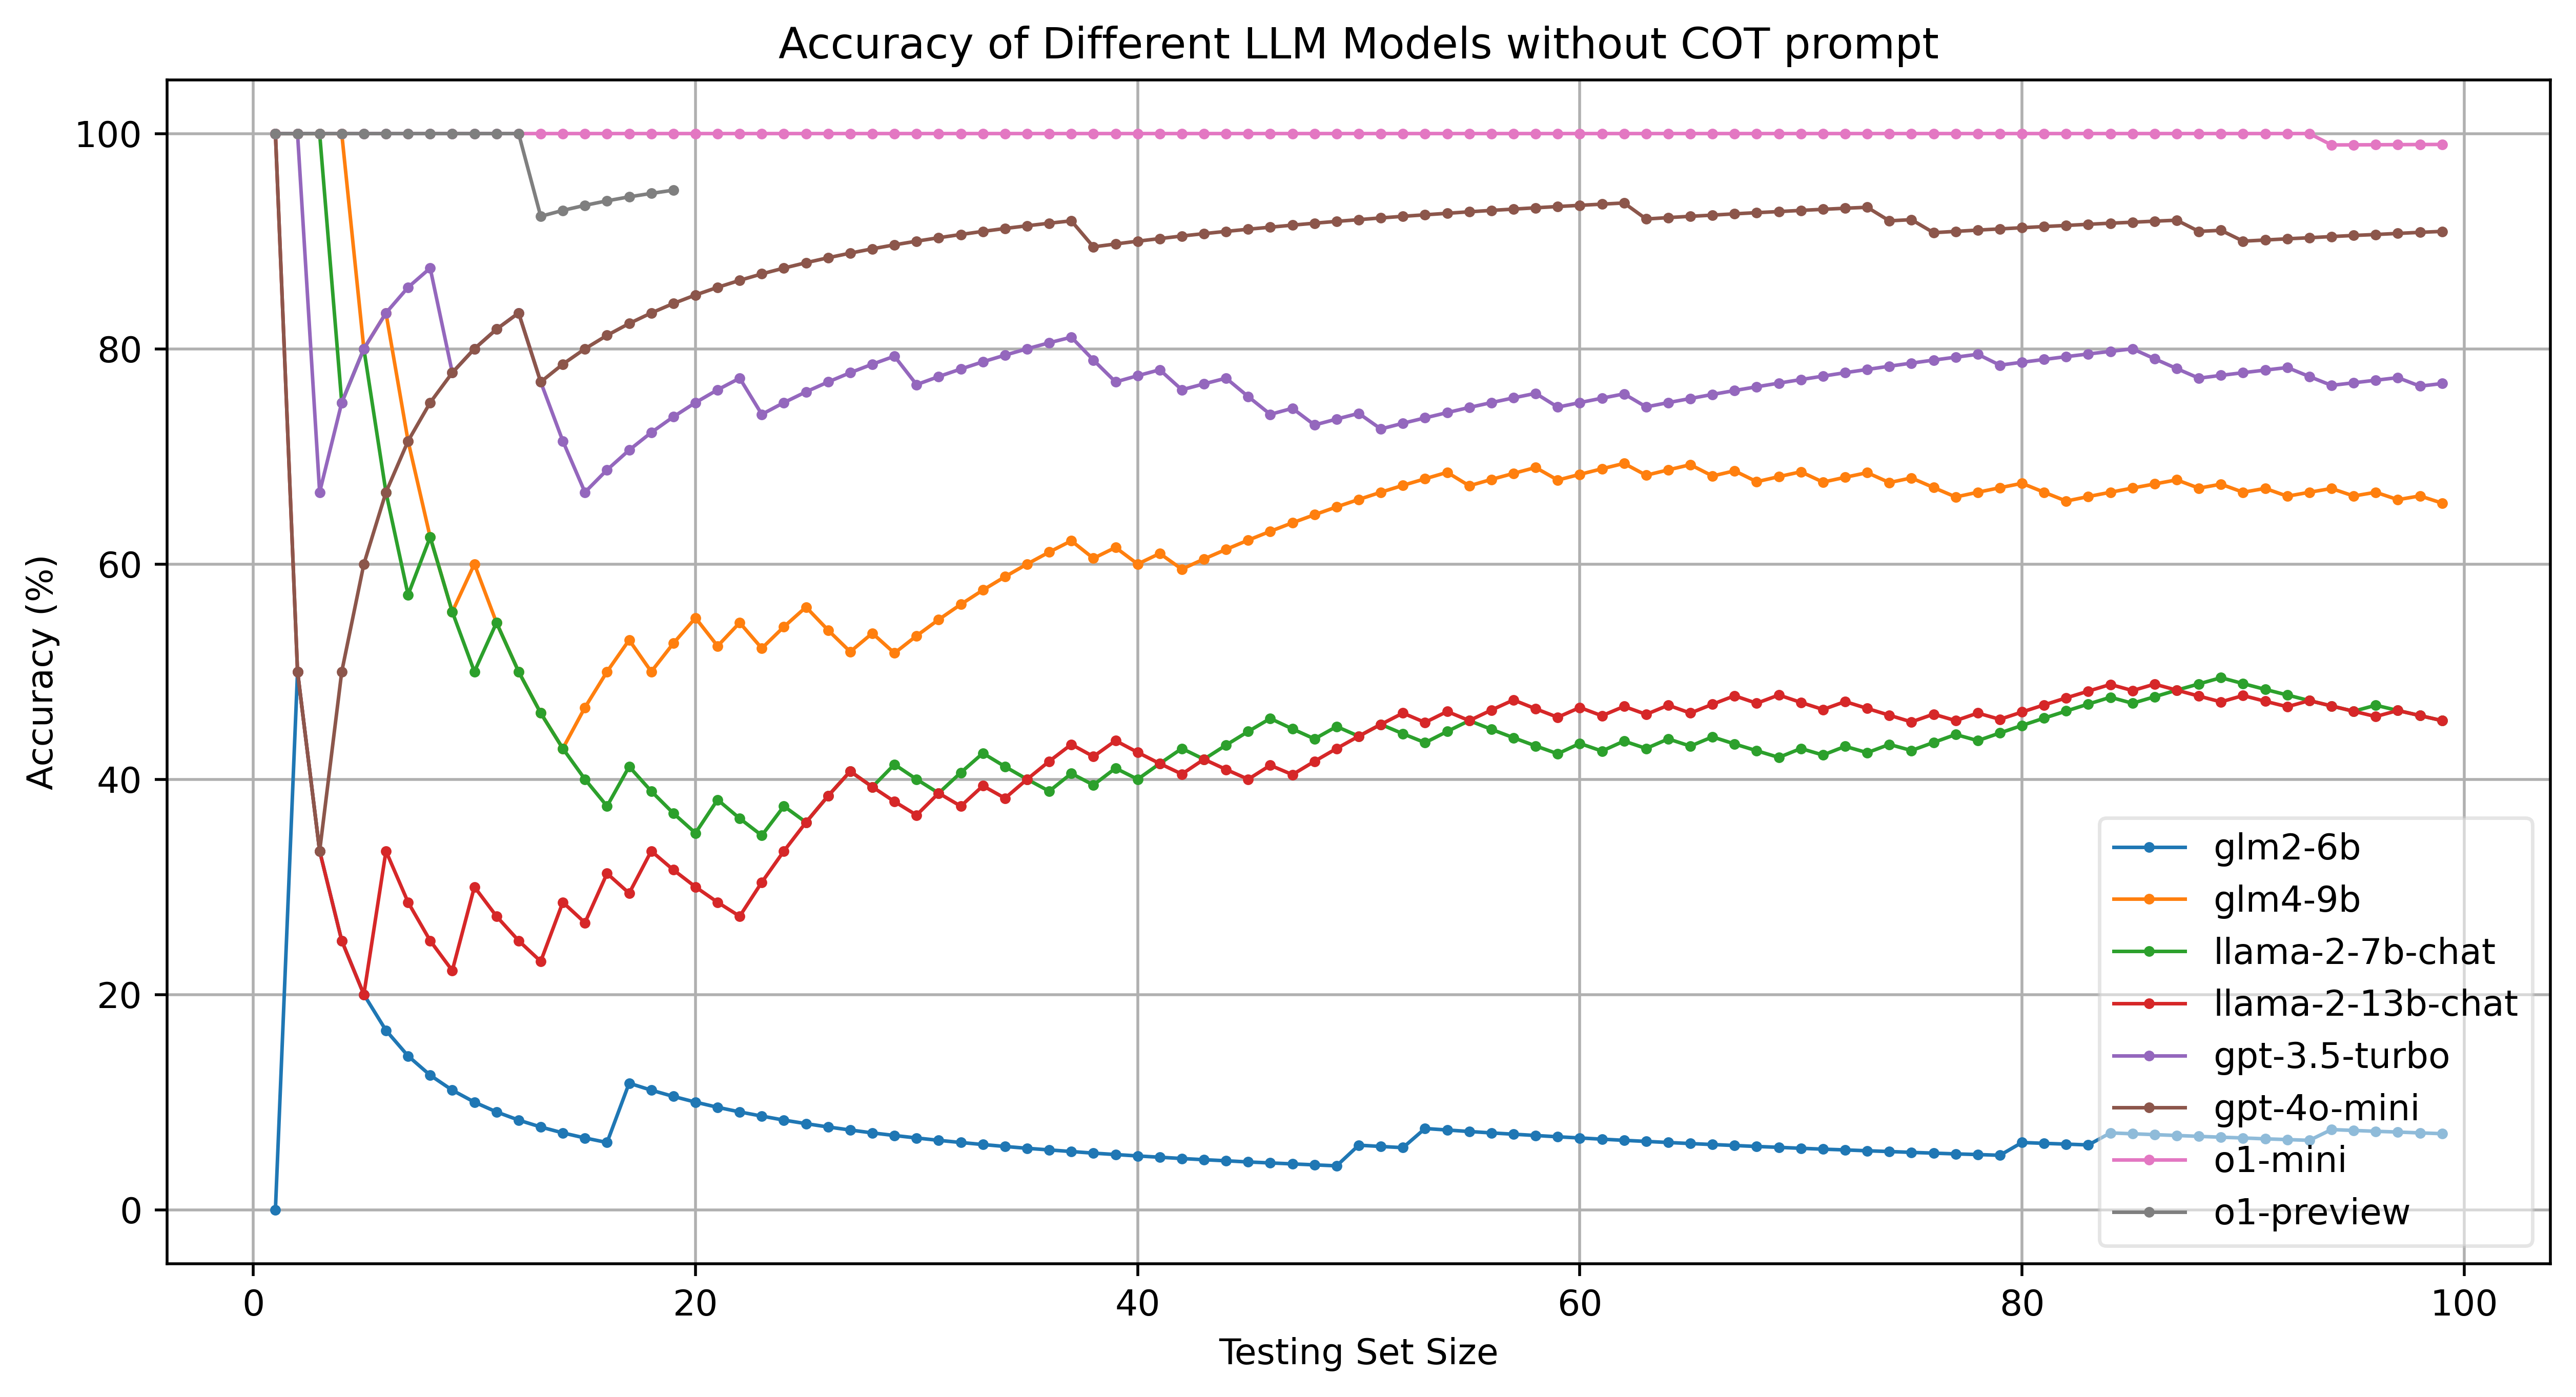

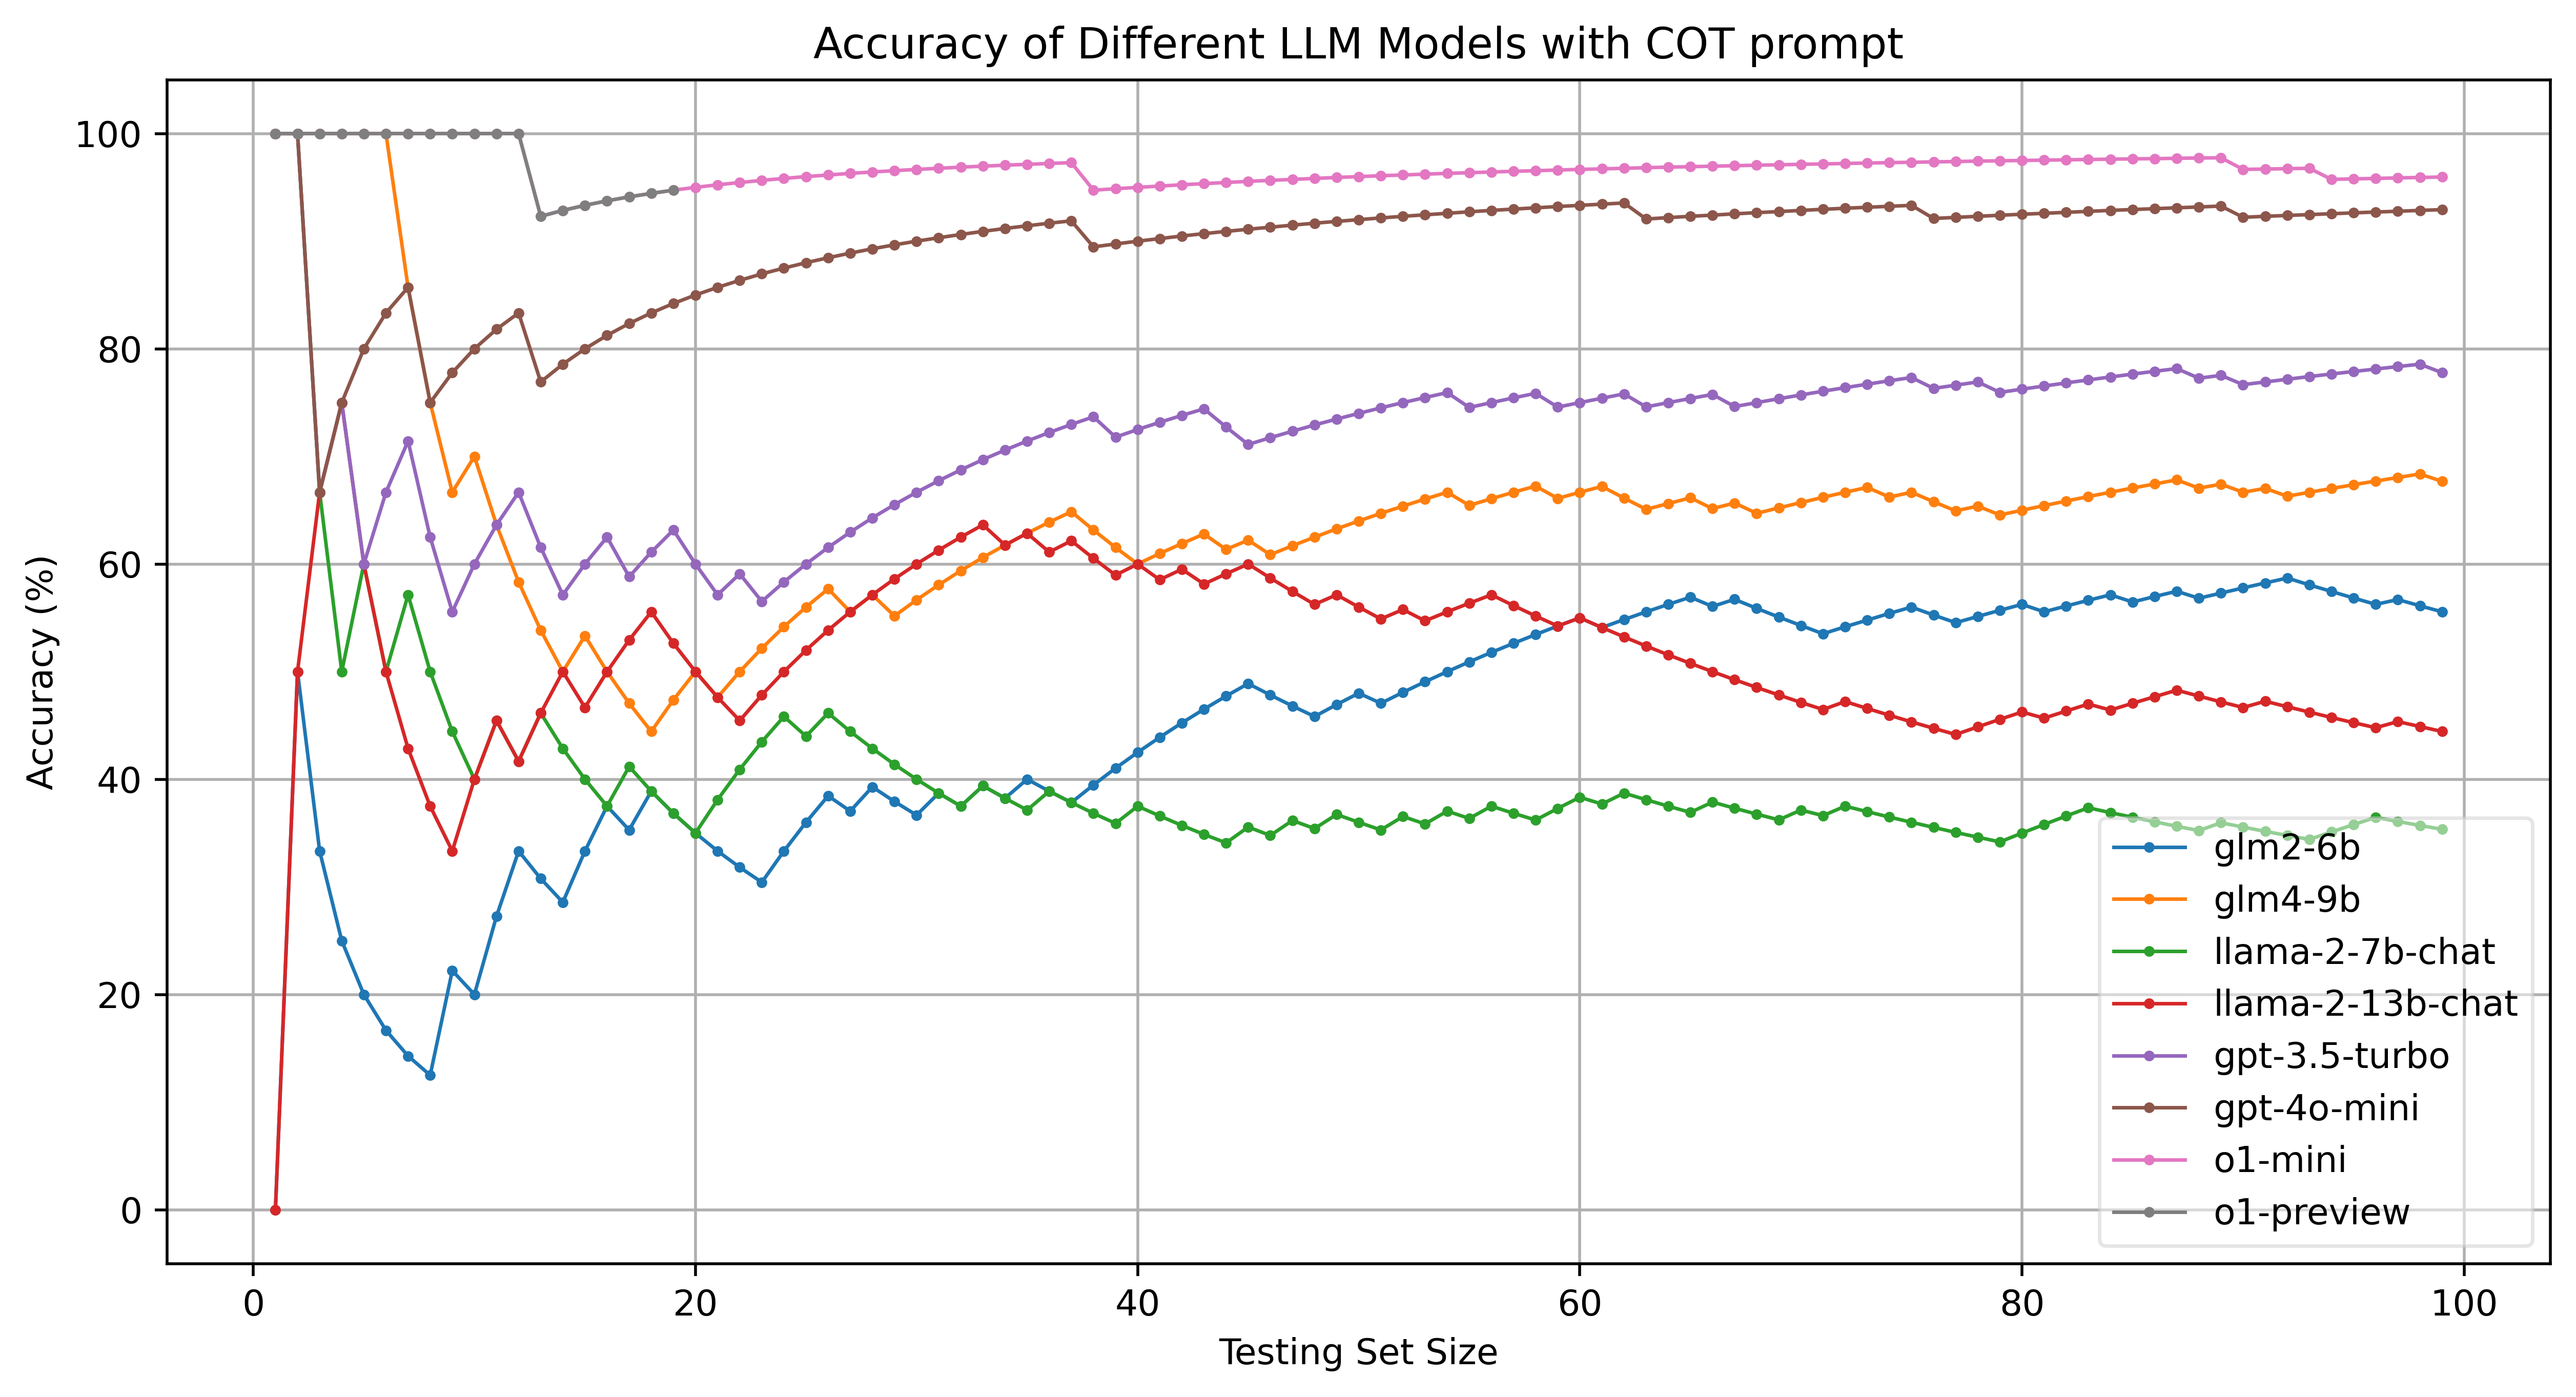

In [11]:
import re

def extract_acc(res:str):
    pattern = r'\[Evaluate\] Accuracy\[(\d+)/(\d+)\] = (\d+\.\d+)%'
    matches = re.findall(pattern, res)
    indices = []
    totals = 0
    accuracy_all = []
    if matches:
        for match in matches:
            index, total, accuracy = match
            indices.append(int(index))
            accuracy_all.append(float(accuracy))
            totals = int(total)
    return indices, accuracy_all, totals

def extract_from_file(filename:str):
    with open(filename, "r") as f:
        res = f.read()
    return extract_acc(res)


file_list_with_cot = [
    "./logs/results_glm2-6b.log",
    "./logs/results_glm4_9b.log",
    "./logs/results_llama_2_7b_chat.log",
    "./logs/results_llama_2_13b_chat.log",
    "./logs/results_gpt-3.5-turbo.log",
    "./logs/results_gpt-4o-mini.log",
    "./logs/results_o1-mini.log",
    "./logs/results_o1-preview.log"
]

labels = ["glm2-6b", "glm4-9b", "llama-2-7b-chat", "llama-2-13b-chat", "gpt-3.5-turbo", "gpt-4o-mini", "o1-mini", "o1-preview"]

file_list_no_cot = [
    "./logs/results_glm2-6b-no-cot.log",
    "./logs/results_glm4_9b-no-cot.log",
    "./logs/results_llama_2_7b_chat-no-cot.log",
    "./logs/results_llama_2_13b_chat-no-cot.log",
    "./logs/results_gpt-3.5-turbo-no-cot.log",
    "./logs/results_gpt-4o-mini-no-cot.log",
    "./logs/results_o1-mini-no-cot.log",
    "./logs/results_o1-preview-no-cot.log"
]

def extract_from_files(file_list):
    results = []
    for file in file_list:
        indices, accuracy_all, totals = extract_from_file(file)
        if indices is not None:
            results.append((indices, accuracy_all, totals))
    return results


def visualize_results(results, title:str):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=500)

    idx = 0
    for indices, accuracy_all, totals in results:
        ax.plot(indices, 
                accuracy_all, 
                label=f"{labels[idx]}", 
                linewidth=1, 
                marker='o', 
                markersize=2)
        idx += 1

    ax.set_xlabel("Testing Set Size")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title(title)
    ax.legend(loc='lower right', framealpha=0.5)
    plt.grid()
    plt.savefig(f"./images/{title}.png", 
                bbox_inches='tight', 
                pad_inches=0.0)
    plt.show()

results_with_cot = extract_from_files(file_list_with_cot)
results_no_cot = extract_from_files(file_list_no_cot)
visualize_results(results_no_cot, "Accuracy of Different LLM Models without COT prompt")
visualize_results(results_with_cot, "Accuracy of Different LLM Models with COT prompt")
